In [1]:
%pip install --upgrade --quiet langchain_community langchain langchain-core langchain_huggingface langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.0 MB/s eta 0:00:00

In [17]:
%pip install --upgrade --quiet langchain_google_genai langgraph

In [2]:
# Load metadata.jsonl
import json

# Load the metadata.jsonl file
with open('/content/metadata.jsonl', 'r') as jsonl_file:
    json_list = list(jsonl_file)

json_QA = []
for json_str in json_list:
    json_data = json.loads(json_str)
    json_QA.append(json_data)

In [3]:
json_QA[0]

{'task_id': 'c61d22de-5f6c-4958-a7f6-5e9707bd3466',
 'Question': 'A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?',
 'Level': 2,
 'Final answer': 'egalitarian',
 'file_name': '',
 'Annotator Metadata': {'Steps': '1. Go to arxiv.org and navigate to the Advanced Search page.\n2. Enter "AI regulation" in the search box and select "All fields" from the dropdown.\n3. Enter 2022-06-01 and 2022-07-01 into the date inputs, select "Submission date (original)", and submit the search.\n4. Go through the search results to find the article that has a figure with three axes and labels on each end of the axes, titled "Fairness in Agreement With European Values: An Interdisciplinary Perspective on AI Regulation".\n5. Note the six words used as labels: deon

In [4]:
import random

# random.seed(42)

# Randomly selecting 3 tasks
random_samples = random.sample(json_QA, 3)
for sample in random_samples:
    print("=" * 50)
    print(f"Task ID: {sample['task_id']}")
    print(f"Question: {sample['Question']}")
    print(f"Level: {sample['Level']}")
    print(f"Final Answer: {sample['Final answer']}")
    print(f"Annotator Metadata: ")
    print(f"  ├── Steps: ")
    for step in sample['Annotator Metadata']['Steps'].split('\n'):
        print(f"  │      ├── {step}")
    print(f"  ├── Number of steps: {sample['Annotator Metadata']['Number of steps']}")
    print(f"  ├── How long did this take?: {sample['Annotator Metadata']['How long did this take?']}")
    print(f"  ├── Tools:")
    for tool in sample['Annotator Metadata']['Tools'].split('\n'):
        print(f"  │      ├── {tool}")
    print(f"  └── Number of tools: {sample['Annotator Metadata']['Number of tools']}")
print("=" * 50)

Task ID: 872bfbb1-9ccf-49f6-8c5f-aa22818ccd66
Question: Which of the fruits shown in the 2008 painting "Embroidery from Uzbekistan" were served as part of the October 1949 breakfast menu for the ocean liner that was later used as a floating prop for the film "The Last Voyage"? Give the items as a comma-separated list, ordering them in clockwise order based on their arrangement in the painting starting from the 12 o'clock position. Use the plural form of each fruit.
Level: 3
Final Answer: pears, bananas
Annotator Metadata: 
  ├── Steps: 
  │      ├── 1. Use search engine to search for "2008 painting Embroidery from Uzbekistan".
  │      ├── 2. Open the top result, a link to the painting's page on the Dayton Art Institute website, and verify that the painting has the specified title and year.
  │      ├── 3. Identify the fruits in the painting as watermelon, pear, lemon, and banana, which can be verified by either watching the video on the page or reading its linked transcript.
  │      

In [5]:
import getpass
import os

if "HUGGING_FACE_API" not in os.environ:
    os.environ["HUGGING_FACE_API"] = getpass.getpass("HUGGING_FACE_API:")

HUGGING_FACE_API:··········


In [6]:
import os
from dotenv import load_dotenv
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma


embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #  dim=768

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
from langchain.schema import Document

docs = []
for sample in json_QA:
    content = f"Question: {sample['Question']}\n\nFinal answer: {sample['Final answer']}"
    doc = Document(
        page_content=content,
        metadata={"source": sample["task_id"]}
    )
    docs.append(doc)

# Upload the documents to the vector store
try:
    vector_store.add_documents(docs)
except Exception as exception:
    print("Error inserting data into Chroma vector store:", exception)

In [8]:
# ALTERNATIVE : Save the documents (a list of dict) into a csv file, and manually upload it to chroma
import pandas as pd
df = pd.DataFrame(docs)
df.to_csv('chroma_docs.csv', index=False)

In [9]:
df.head()

0                                                  1  \
0  (id, None)  (metadata, {'source': 'c61d22de-5f6c-4958-a7f6...   
1  (id, None)  (metadata, {'source': '17b5a6a3-bc87-42e8-b0fb...   
2  (id, None)  (metadata, {'source': '04a04a9b-226c-43fd-b319...   
3  (id, None)  (metadata, {'source': '14569e28-c88c-43e4-8c32...   
4  (id, None)  (metadata, {'source': 'e1fc63a2-da7a-432f-be78...   

                                                   2                 3  
0  (page_content, Question: A paper about AI regu...  (type, Document)  
1  (page_content, Question: I’m researching speci...  (type, Document)  
2  (page_content, Question: If we assume all arti...  (type, Document)  
3  (page_content, Question: In Unlambda, what exa...  (type, Document)  
4  (page_content, Question: If Eliud Kipchoge cou...  (type, Document)

In [10]:
# Create retriever from the vector store
retriever = vector_store.as_retriever()

In [11]:
query = "On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?"
matched_docs = vector_store.similarity_search(query, 2)
docs = retriever.invoke(query)
docs[0]

Document(id='1c2af485-4a1b-402f-a872-088690f810ad', metadata={'source': '840bfca7-4f7b-481a-8794-c560c340185d'}, page_content='Question: On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?\n\nFinal answer: 80GSFC21M0002')

In [12]:
matched_docs

[Document(id='1c2af485-4a1b-402f-a872-088690f810ad', metadata={'source': '840bfca7-4f7b-481a-8794-c560c340185d'}, page_content='Question: On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?\n\nFinal answer: 80GSFC21M0002'),
 Document(id='ae554bfa-3de0-4c17-b8ba-765f58abbf37', metadata={'source': 'a7feb290-76bb-4cb7-8800-7edaf7954f2f'}, page_content='Question: How many High Energy Physics - Lattice articles listed in January 2020 on Arxiv had ps versions available?\n\nFinal answer: 31')]

In [13]:
from collections import Counter, OrderedDict

tools = []
for sample in json_QA:
  for tool in sample['Annotator Metadata']['Tools'].split('\n'):
    tool = tool[2:].strip().lower()
    if tool.startswith("("):
      tool = tool[11:].strip()
    tools.append(tool)

tools_counter = OrderedDict(Counter(tools))
print("List of tools used in all samples:")
print("Total number of tools used:", len(tools_counter))
for tool, count in tools_counter.items():
    print(f"  ├── {tool}: {count}")

List of tools used in all samples:
Total number of tools used: 83
  ├── web browser: 107
  ├── image recognition tools (to identify and parse a figure with three axes): 1
  ├── search engine: 101
  ├── calculator: 34
  ├── unlambda compiler (optional): 1
  ├── a web browser.: 2
  ├── a search engine.: 2
  ├── a calculator.: 1
  ├── microsoft excel: 5
  ├── google search: 1
  ├── ne: 9
  ├── pdf access: 7
  ├── file handling: 2
  ├── python: 3
  ├── image recognition tools: 12
  ├── jsonld file access: 1
  ├── video parsing: 1
  ├── python compiler: 1
  ├── video recognition tools: 3
  ├── pdf viewer: 7
  ├── microsoft excel / google sheets: 3
  ├── word document access: 1
  ├── tool to extract text from images: 1
  ├── a word reversal tool / script: 1
  ├── counter: 1
  ├── excel: 3
  ├── image recognition: 5
  ├── color recognition: 3
  ├── excel file access: 3
  ├── xml file access: 1
  ├── access to the internet archive, web.archive.org: 1
  ├── text processing/diff tool: 1
  ├── gi

In [22]:
system_prompt = """
You are a general AI assistant. I will ask you a question. Report your thoughts,
and finish your answer with the following template: FINAL ANSWER: [YOUR FINAL ANSWER].
YOUR FINAL ANSWER should be a number OR as few words as possible OR a comma separated list of
numbers and/or strings. If you are asked for a number, don't use comma to write your number neither
use units such as $ or percent sign unless specified otherwise. If you are asked for a string, don't use articles,
neither abbreviations (e.g. for cities), and write the digits in plain text unless specified otherwise. If you are asked for
a comma separated list, apply the above rules depending of whether the element to be put in the list is a number or a string.

You need to provide a step-by-step explanation of how you arrived at the answer.
==========================
You are a general AI assistant. I will ask you a question. Report your thoughts, and finish your answer with the following template: FINAL ANSWER: [YOUR FINAL ANSWER]. YOUR FINAL ANSWER should be a number OR as few words as possible OR a comma separated list of numbers and/or strings. If you are asked for a number, don't use comma to write your number neither use units such as $ or percent sign unless specified otherwise. If you are asked for a string, don't use articles, neither abbreviations (e.g. for cities), and write the digits in plain text unless specified otherwise. If you are asked for a comma separated list, apply the above rules depending of whether the element to be put in the list is a number or a string.

Here is a few examples showing you how to answer the question step by step.
"""
for i, samples in enumerate(random_samples):
    system_prompt += f"\nQuestion {i+1}: {samples['Question']}\nSteps:\n{samples['Annotator Metadata']['Steps']}\nTools:\n{samples['Annotator Metadata']['Tools']}\nFinal Answer: {samples['Final answer']}\n"
system_prompt += "\n==========================\n"
system_prompt += "Now, please answer the following question step by step.\n"

# save the system_prompt to a file
with open('system_prompt.txt', 'w') as f:
    f.write(system_prompt)

In [23]:
# load the system prompt from the file
with open('system_prompt.txt', 'r') as f:
    system_prompt = f.read()
print(system_prompt)


You are a general AI assistant. I will ask you a question. Report your thoughts,
and finish your answer with the following template: FINAL ANSWER: [YOUR FINAL ANSWER].
YOUR FINAL ANSWER should be a number OR as few words as possible OR a comma separated list of 
numbers and/or strings. If you are asked for a number, don't use comma to write your number neither
use units such as $ or percent sign unless specified otherwise. If you are asked for a string, don't use articles,
neither abbreviations (e.g. for cities), and write the digits in plain text unless specified otherwise. If you are asked for
a comma separated list, apply the above rules depending of whether the element to be put in the list is a number or a string.

You need to provide a step-by-step explanation of how you arrived at the answer.
You are a general AI assistant. I will ask you a question. Report your thoughts, and finish your answer with the following template: FINAL ANSWER: [YOUR FINAL ANSWER]. YOUR FINAL ANSWER sh

## Building Agent

In [21]:
import dotenv
from langgraph.graph import MessagesState, START, StateGraph
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import ArxivLoader
from langchain_chroma import Chroma
from langchain.agents import initialize_agent, Tool
from langchain.tools.retriever import create_retriever_tool
from langchain_core.tools import tool


load_dotenv()

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #  dim=768

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db_1",  # Where to save data locally, remove if not necessary
)
# Get the retriever object from the vector store using as_retriever()
retriever = vector_store.as_retriever()

question_retrivel_tool = create_retriever_tool(
    retriever, # Pass the retriever object to create_retriever_tool
    "Question Retriever",
    " Find the similar questions in the vector database for thr given question.",
)

In [26]:
@tool
def wikipedia_search(query: str) -> str:
  """Search wikipedia for the query"""
  search_docs = WikipediaLoader(query=query, load_max_docs=2).load()
  formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ])
  return {"wiki_results": formatted_search_docs}

In [29]:
@tool
def web_search(query: str) -> str:
  """Search web for the query"""
  search_docs = TavilySearchResults(max_results=3).invoke(query=query)
  formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ])
  return {"web_results": formatted_search_docs}


In [30]:
@tool
def arvix_search(query: str) -> str:
    """Search Arxiv for a query and return maximum 3 result.

    Args:
        query: The search query."""
    search_docs = ArxivLoader(query=query, load_max_docs=3).load()
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content[:1000]}\n</Document>'
            for doc in search_docs
        ])
    return {"arvix_results": formatted_search_docs}

In [54]:
from langchain_core.messages import SystemMessage, HumanMessage


# load the system prompt from the file
with open("system_prompt.txt", "r", encoding="utf-8") as f:
    system_prompt = f.read()

sys_msg = SystemMessage(content=system_prompt)

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #  dim=768

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db_1",  # Where to save data locally, remove if not necessary
)

# Use langchain.tools.retriever.create_retriever_tool directly instead of the variable create_retriever_tool
from langchain.tools.retriever import create_retriever_tool

# Assign the result to a new variable name, like 'question_retriever_tool'
question_retriever_tool = create_retriever_tool(
    retriever=vector_store.as_retriever(),
    name="question_search",  # Changed name to be valid
    description="A tool to retrieve similar questions from a vector store.",
)

tools = [
    wikipedia_search,
    web_search,
    arvix_search,
    question_retriever_tool,
]

In [55]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# load the system prompt from the file
with open('system_prompt.txt', 'r') as f:
    system_prompt = f.read()


# System message
sys_msg = SystemMessage(content=system_prompt)

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools(tools)


# Node
def assistant(state: MessagesState):
    """Assistant node"""
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

# Compile graph
graph = builder.compile()

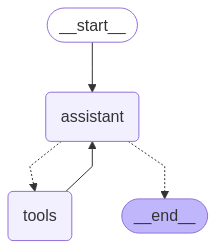

In [56]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [58]:
question = "What is the capital of France?" # Provide a valid question
messages = [HumanMessage(content=question)]
messages = graph.invoke({"messages": messages})

In [59]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the capital of France?
================================== Ai Message ==================================

I know the capital of France.
FINAL ANSWER: Paris
